#### count 条形图: 单列观测值数量
- seaborn.catplot(kind='count'): figure-level
- seaborn.countplot(): axes-level

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('./input/athlete_events.csv')
df2 = pd.read_csv('./input/noc_regions.csv')
df = pd.merge(
    df1, df2,
    on='NOC',
    how='left',
    validate='m:1')

In [3]:
sns.set(
    context='talk',  # paper, notebook, talk, poster
    style='darkgrid',  # darkgrid, whitegrid, dark, white, ticks
    palette='pastel',  # deep,muted,bright,pastel,dark,colorblind,hls,husl,cm
    rc={
        'figure.figsize': [8, 6],
        'font.sans-serif': ['Hiragino Sans GB']  # ['SimHei']
    }
)

In [4]:
df_temp = pd.DataFrame({
    'A': ['x', 'x', 'y', 'y', 'y', np.NaN],
    'B': [1,2,3,4,5,6]
})
df_temp

,A,B
0,x,1
1,x,2
2,y,3
3,y,4
4,y,5
5,NaN,6


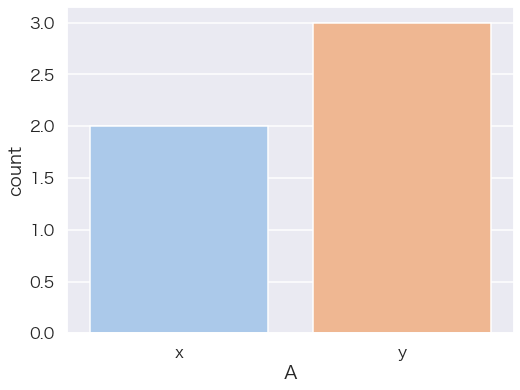

In [5]:
sns.countplot(
    x='A',
    data=df_temp
)

In [6]:
df_temp.groupby('A').agg('count')

,B
A,
x,2
y,3


In [7]:
df_medal = df.dropna(subset=['Medal']).convert_dtypes()
df_medal = df_medal.sort_values('Age')
df_medal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 142882 to 270358
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      39783 non-null  Int64  
 1   Name    39783 non-null  string 
 2   Sex     39783 non-null  string 
 3   Age     39051 non-null  Int64  
 4   Height  31072 non-null  Int64  
 5   Weight  30456 non-null  float64
 6   Team    39783 non-null  string 
 7   NOC     39783 non-null  string 
 8   Games   39783 non-null  string 
 9   Year    39783 non-null  Int64  
 10  Season  39783 non-null  string 
 11  City    39783 non-null  string 
 12  Sport   39783 non-null  string 
 13  Event   39783 non-null  string 
 14  Medal   39783 non-null  string 
 15  region  39774 non-null  string 
 16  notes   545 non-null    string 
dtypes: Int64(4), float64(1), string(12)
memory usage: 5.6 MB


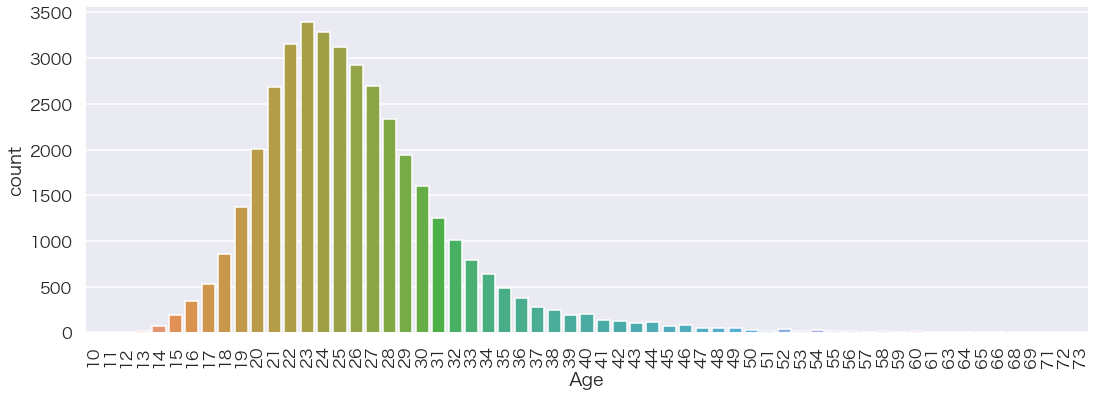

In [8]:
plt.figure(figsize=[18, 6])
ax = sns.countplot(
    x='Age',
    data=df_medal
)
ax.tick_params(
    rotation=90, axis='x')

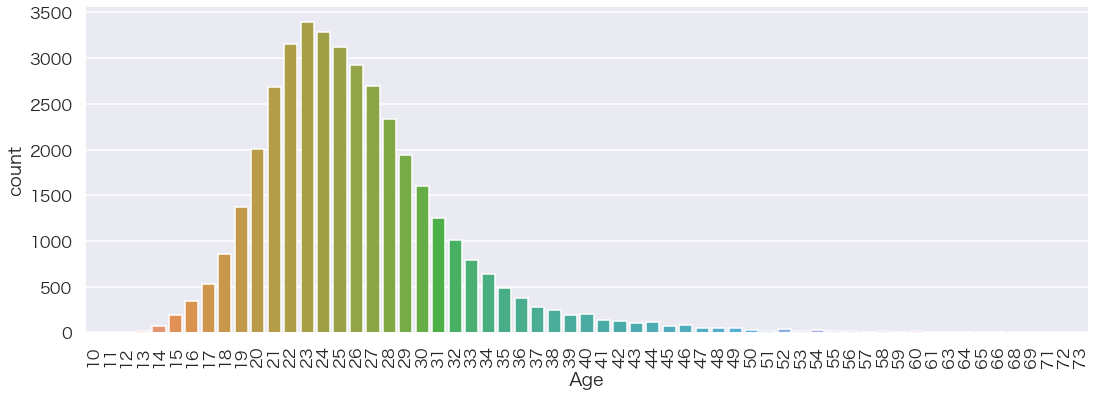

In [9]:
plt.figure(figsize=[18, 6])
ax = sns.countplot(
    df_medal['Age']
)
ax.tick_params(
    rotation=90, axis='x')

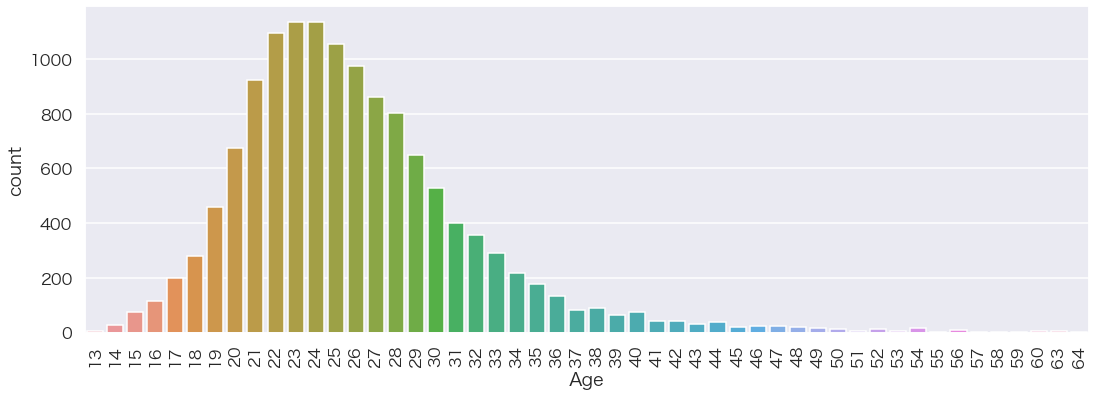

In [10]:
plt.figure(figsize=[18, 6])
ax = sns.countplot(
    x='Age',
    data=df_medal.query("Medal=='Gold'")
)
ax.tick_params(
    rotation=90, axis='x')

In [11]:
df_medal = df_medal.drop_duplicates(
    subset=['Games', 'Event', 'Medal']
)
df_medal = df_medal.query('Year>=1984')
df_medal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9296 entries, 80827 to 222156
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      9296 non-null   Int64  
 1   Name    9296 non-null   string 
 2   Sex     9296 non-null   string 
 3   Age     9296 non-null   Int64  
 4   Height  9173 non-null   Int64  
 5   Weight  9145 non-null   float64
 6   Team    9296 non-null   string 
 7   NOC     9296 non-null   string 
 8   Games   9296 non-null   string 
 9   Year    9296 non-null   Int64  
 10  Season  9296 non-null   string 
 11  City    9296 non-null   string 
 12  Sport   9296 non-null   string 
 13  Event   9296 non-null   string 
 14  Medal   9296 non-null   string 
 15  region  9292 non-null   string 
 16  notes   63 non-null     string 
dtypes: Int64(4), float64(1), string(12)
memory usage: 1.3 MB


In [12]:
s = df_medal['region'].value_counts().head(10)
s

USA            1149
Russia          870
Germany         810
China           583
France          357
UK              335
Australia       334
Italy           328
Canada          309
South Korea     283
Name: region, dtype: Int64

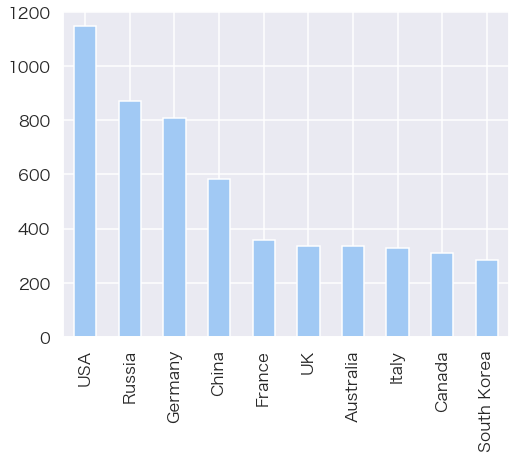

In [13]:
s.plot(kind='bar')

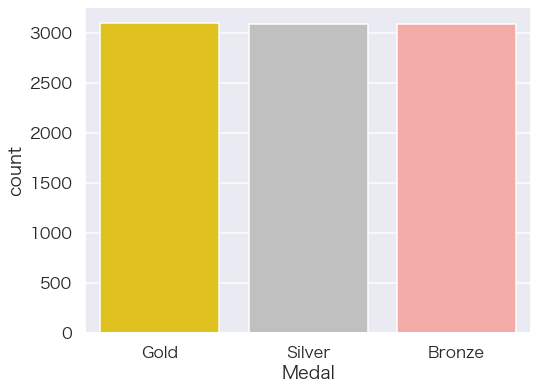

In [14]:
sns.countplot(
    x='Medal',
    data=df_medal,
    order=['Gold', 'Silver', 'Bronze'],
    palette=['Gold', 'Silver', 'r']
)

Text(0.5, 1.0, '中美1984年后奖牌总数对比')

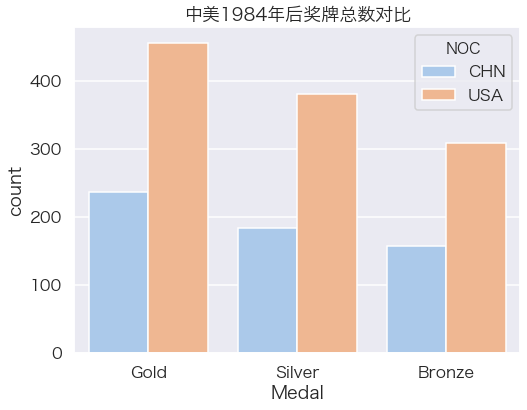

In [15]:
ax = sns.countplot(
    x='Medal',
    hue='NOC',
    data=df_medal[df_medal['NOC'].isin(['CHN', 'USA'])],
    order=['Gold', 'Silver', 'Bronze'],
)
ax.set_title('中美1984年后奖牌总数对比')

Text(0.5, 1.0, '中美2008年奖牌总数对比')

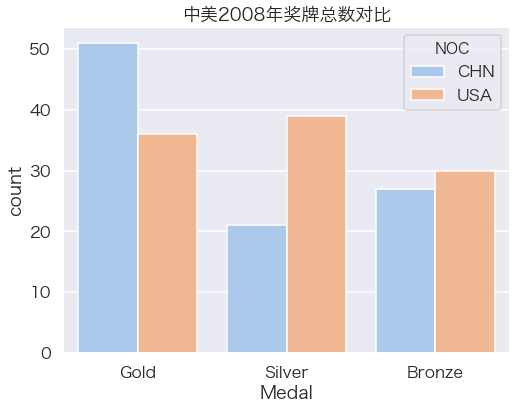

In [16]:
ax = sns.countplot(
    x='Medal',
    hue='NOC',
    data=df_medal[
        df_medal['NOC'].isin(['CHN', 'USA']) &
        (df_medal['Year']==2008)
    ],
    order=['Gold', 'Silver', 'Bronze'],
)
ax.set_title('中美2008年奖牌总数对比')

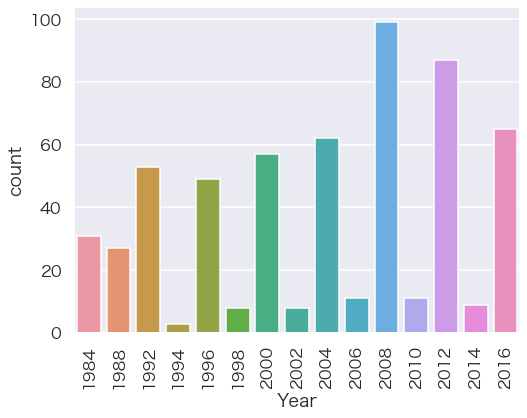

In [17]:
ax = sns.countplot(
    x='Year',
    data = df_medal[
        df_medal['NOC'].isin(['CHN'])
    ]
)
ax.tick_params(rotation=90, axis='x')

Text(0.5, 1.0, '我国每年的奖牌数')

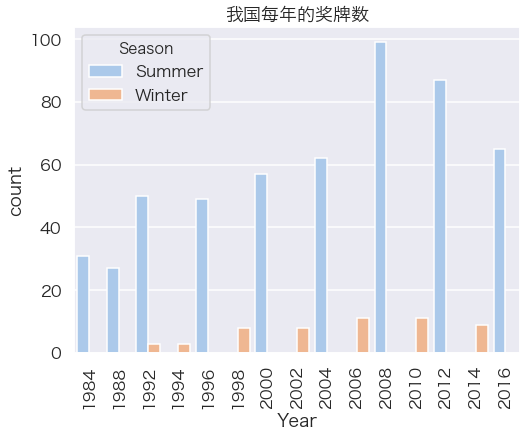

In [18]:
ax = sns.countplot(
    x='Year',
    hue='Season',
    data = df_medal[
        df_medal['NOC'].isin(['CHN'])
    ]
)
ax.tick_params(rotation=90, axis='x')
ax.set_title("我国每年的奖牌数")

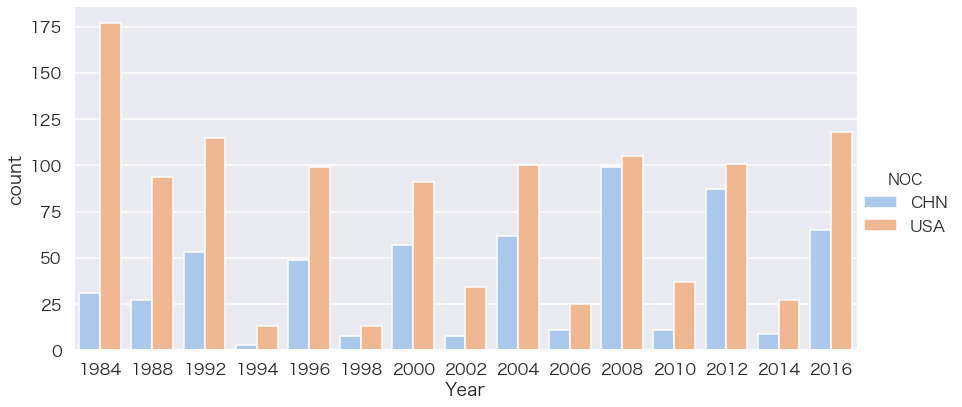

In [19]:
sns.catplot(
    kind='count',
    x='Year',
    hue='NOC',
    data = df_medal[df_medal['NOC'].isin(['CHN', 'USA'])],
    aspect=2,
    height=6
)